In [28]:
#Import Packages, Load Data, View Data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [30]:
loandata = pd.read_csv('df1_loan.csv')

In [31]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [32]:
loandata.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [33]:
#Missing Values?

In [34]:
missingvalues = pd.concat([loandata.isnull().sum(), 100 * loandata.isnull().mean()], axis=1)
missingvalues.columns=['count', '%']
missingvalues.sort_values(by='count', ascending=False)

,count,%
Credit_History,41,8.2
Self_Employed,27,5.4
LoanAmount,18,3.6
Loan_Amount_Term,14,2.8
Dependents,12,2.4
Gender,9,1.8
Married,3,0.6
Unnamed: 0,0,0.0
Loan_ID,0,0.0
Education,0,0.0


In [35]:
loandata2 = loandata.dropna()

In [36]:
loandata2.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0


In [37]:
missingvalues2 = pd.concat([loandata2.isnull().sum(), 100 * loandata2.isnull().mean()], axis=1)
missingvalues2.columns=['count', '%']
missingvalues2.sort_values(by='count', ascending=False)

,count,%
Unnamed: 0,0,0.0
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0


In [38]:
loandata3 = loandata2.drop(columns=['Gender', 'Loan_Amount_Term'])

In [39]:
loandata3.head()

,Unnamed: 0,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,$6091.0
2,2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,$4941.0
4,4,LP001008,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y,$9613.0


In [40]:
doubles = loandata3['Loan_ID'].duplicated().any()

In [41]:
loandata3.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,249.684615,5420.438462,1537.261333,142.289744,0.851282
std,144.275160,6025.716584,2268.942117,75.929142,0.356267
min,1.000000,150.000000,0.000000,17.000000,0.000000
25%,132.250000,2883.750000,0.000000,100.000000,1.000000
50%,249.500000,3901.000000,1062.000000,127.500000,1.000000
75%,375.750000,5827.000000,2250.000000,164.750000,1.000000
max,499.000000,81000.000000,20000.000000,600.000000,1.000000


In [42]:
#View Income Relationships

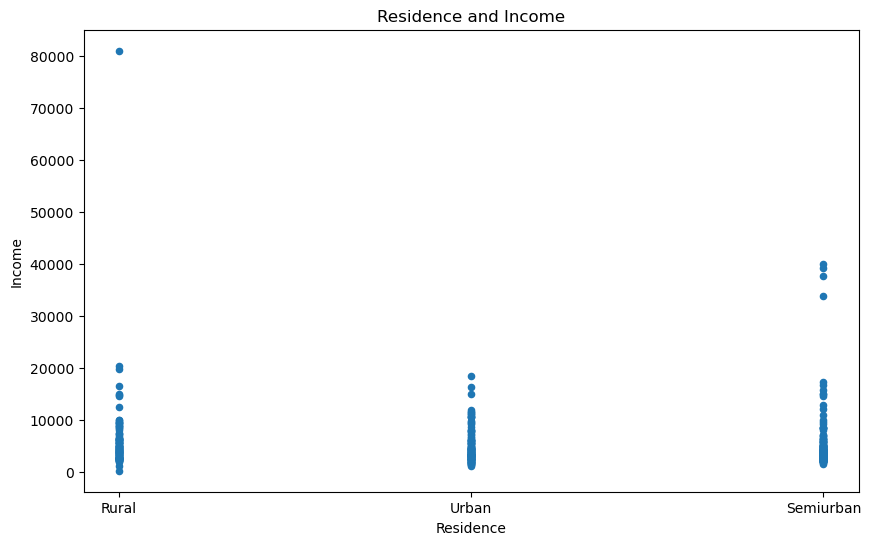

In [43]:
ax = loandata3.plot.scatter(x="Property_Area", y="ApplicantIncome", rot=0, legend=False, figsize=(10, 6))
ax.set_xlabel("Residence")
ax.set_ylabel("Income")
ax.set_title("Residence and Income")

plt.show()

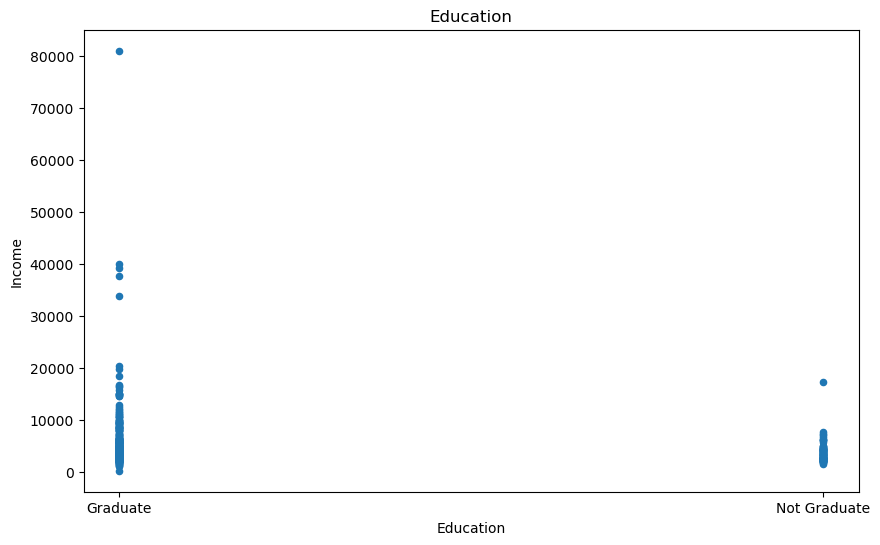

In [44]:
ax = loandata3.plot.scatter(x="Education", y="ApplicantIncome", rot=0, legend=False, figsize=(10, 6))
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_title("Education")

plt.show()

In [45]:
#View Numerical Features

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

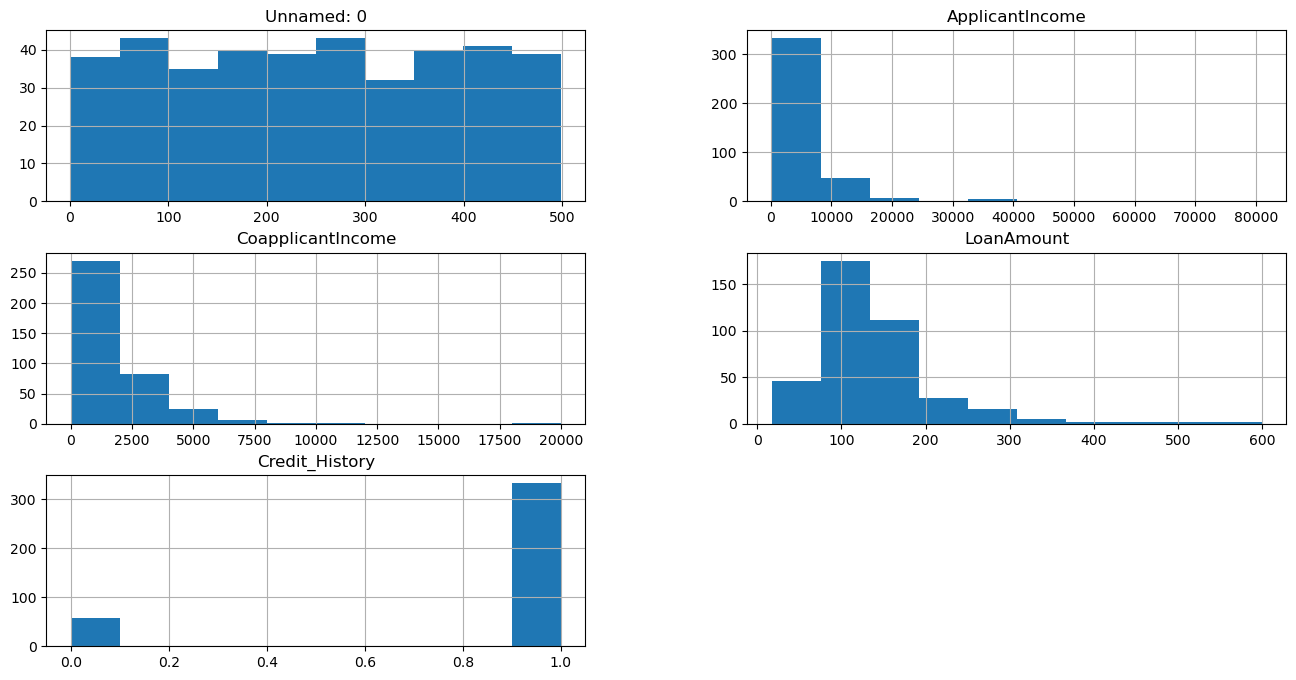

In [46]:
loandata3.hist(figsize=(16, 8))

In [47]:
#Dependents Data?

In [48]:
loandata3.loc[loandata3.Dependents == "0"]

,Unnamed: 0,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
2,2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,$4941.0
4,4,LP001008,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,$6000.0
6,6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,1.0,Urban,Y,$3849.0
13,13,LP001029,No,0,Graduate,No,1853,2840.0,114.0,1.0,Rural,N,$4693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,492,LP002571,No,0,Not Graduate,No,3691,0.0,110.0,1.0,Rural,Y,$3691.0
493,493,LP002582,No,0,Not Graduate,Yes,17263,0.0,225.0,1.0,Semiurban,Y,$17263.0
494,494,LP002585,Yes,0,Graduate,No,3597,2157.0,119.0,0.0,Rural,N,$5754.0
496,496,LP002587,Yes,0,Not Graduate,No,2600,1700.0,107.0,1.0,Rural,Y,$4300.0


In [49]:
loandata3.loc[loandata3.Dependents == "1"]

,Unnamed: 0,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,$6091.0
9,9,LP001020,Yes,1,Graduate,No,12841,10968.0,349.0,1.0,Semiurban,N,$23809.0
21,21,LP001046,Yes,1,Graduate,No,5955,5625.0,315.0,1.0,Urban,Y,$11580.0
32,32,LP001097,No,1,Graduate,Yes,4692,0.0,106.0,1.0,Rural,N,$4692.0
46,46,LP001138,Yes,1,Graduate,No,5649,0.0,44.0,1.0,Urban,Y,$5649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,478,LP002531,Yes,1,Graduate,Yes,16667,2250.0,86.0,1.0,Semiurban,Y,$18917.0
485,485,LP002544,Yes,1,Not Graduate,No,1958,2436.0,131.0,1.0,Rural,Y,$4394.0
487,487,LP002547,Yes,1,Graduate,No,18333,0.0,500.0,1.0,Urban,N,$18333.0
495,495,LP002586,Yes,1,Graduate,No,3326,913.0,105.0,1.0,Semiurban,Y,$4239.0


In [50]:
loandata3.loc[loandata3.Dependents == "2"]

,Unnamed: 0,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
5,5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y,$9613.0
8,8,LP001018,Yes,2,Graduate,No,4006,1526.0,168.0,1.0,Urban,Y,$5532.0
10,10,LP001024,Yes,2,Graduate,No,3200,700.0,70.0,1.0,Urban,Y,$3900.0
12,12,LP001028,Yes,2,Graduate,No,3073,8106.0,200.0,1.0,Urban,Y,$11179.0
14,14,LP001030,Yes,2,Graduate,No,1299,1086.0,17.0,1.0,Urban,Y,$2385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,LP002527,Yes,2,Graduate,Yes,16525,1014.0,150.0,1.0,Rural,Y,$17539.0
476,476,LP002529,Yes,2,Graduate,No,6700,1750.0,230.0,1.0,Semiurban,Y,$8450.0
484,484,LP002543,Yes,2,Graduate,No,8333,0.0,246.0,1.0,Semiurban,Y,$8333.0
486,486,LP002545,No,2,Graduate,No,3547,0.0,80.0,0.0,Rural,N,$3547.0


In [51]:
#Nobody with more than 2 dependents are applying for loans with us

In [52]:
loandata3.loc[loandata3.Dependents == "3"]

,Unnamed: 0,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income


In [53]:
# Data has been wrangling, missing values have been accounted for, and small relationships have been viewed to extend to into my Data Analysis